# Statistical Comparison of F1 Scores Across Models

This analysis compares the $F_1$ scores of all models (MLP, CNN, LSTM, GRU, Transformer, RF, GTN, TFT) using both parametric and non-parametric statistical tests:

- **Kruskal-Wallis Test**: Checks whether there are significant differences in median $F_1$ scores across models.
- **ANOVA F-Test**: Assesses whether group means differ significantly under normality assumptions.
- **Post-hoc Dunn Test** (with Holm correction): Identifies which specific model pairs differ significantly.

A heatmap summarizes the pairwise p-values of the Dunn test for the testing split.


In [3]:
import pandas as pd
from scipy.stats import kruskal, f_oneway
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

In [4]:
import os
import pandas as pd

# base directory where the cv result CSVs live
BASE_DIR = "/Users/paulinebecker/Desktop/mesogeos_git/mesogeos/csv/crossValidation/cv_results"

# model names (must match the "<model>_cv_results.csv" file pattern)
model_names = [
    "cnn",
    "mlp",
    "gru",
    "gtn",
    "lstm",
    "rf",
    "tft",
    "transformer",
]

summary_rows = []

for model in model_names:
    file_path = os.path.join(BASE_DIR, f"{model}_cv_results.csv")
    df = pd.read_csv(file_path)

    # compute means and stds for numeric columns
    means = df.mean(numeric_only=True)
    stds = df.std(numeric_only=True)

    # abbreviation rule
    abbreviation = model.upper() if model != "transformer" else "Transformer"

    # build a row for this model
    summary_rows.append({
        "model": model,
        "Abbreviations": abbreviation,

        # Validation metrics
        "AUC-PR_Validation_mean": means.get("val_aucpr", float("nan")),
        "AUC-PR_Validation_std": stds.get("val_aucpr", float("nan")),
        "F1_Validation_mean": means.get("val_f1_score", float("nan")),
        "F1_Validation_std": stds.get("val_f1_score", float("nan")),

        # Training metrics
        "AUC-PR_Training_mean": means.get("train_aucpr", float("nan")),
        "AUC-PR_Training_std": stds.get("train_aucpr", float("nan")),
        "F1_Training_mean": means.get("train_f1_score", float("nan")),
        "F1_Training_std": stds.get("train_f1_score", float("nan")),

        # Test metrics (this is what you'll sort by)
        "AUC-PR_Testing_mean": means.get("test_aucpr", float("nan")),
        "AUC-PR_Testing_std": stds.get("test_aucpr", float("nan")),
        "F1_Testing_mean": means.get("test_f1_score", float("nan")),
        "F1_Testing_std": stds.get("test_f1_score", float("nan")),
    })

# merge all rows into one DataFrame
merge_df = pd.DataFrame(summary_rows)

# sort by test F1 mean
merge_df = merge_df.sort_values(by="F1_Testing_mean", ascending=True)

# optional: save to disk
out_path = os.path.join(BASE_DIR, "cv_summary_means_std_sorted.csv")
merge_df.to_csv(out_path, index=False)

print(f"\nSaved to: {out_path}")
merge_df



Saved to: /Users/paulinebecker/Desktop/mesogeos_git/mesogeos/csv/crossValidation/cv_results/cv_summary_means_std_sorted.csv


,model,Abbreviations,AUC-PR_Validation_mean,AUC-PR_Validation_std,F1_Validation_mean,F1_Validation_std,AUC-PR_Training_mean,AUC-PR_Training_std,F1_Training_mean,F1_Training_std,AUC-PR_Testing_mean,AUC-PR_Testing_std,F1_Testing_mean,F1_Testing_std
5,rf,RF,0.843252,0.027739,0.746053,0.057174,0.998956,0.000093,0.983999,0.000852,0.841199,0.024635,0.751735,0.028656
0,cnn,CNN,0.860022,0.023274,0.796122,0.021605,0.889792,0.007249,0.815675,0.006472,0.857089,0.018623,0.788019,0.021384
2,gru,GRU,0.881954,0.025310,0.808862,0.020700,0.889188,0.013285,0.816778,0.011517,0.874135,0.023379,0.800572,0.020249
6,tft,TFT,0.885149,0.024899,0.811340,0.022673,0.876551,0.029110,0.808841,0.022870,0.877083,0.015125,0.801551,0.021066
4,lstm,LSTM,0.884679,0.023958,0.813372,0.017950,0.894300,0.013152,0.825007,0.014433,0.876242,0.020124,0.805137,0.015434
1,mlp,MLP,0.885205,0.024726,0.811846,0.024596,0.905288,0.019120,0.828276,0.017570,0.878071,0.021371,0.805153,0.020380
3,gtn,GTN,0.881576,0.022901,0.810005,0.025728,0.888537,0.022019,0.814943,0.018620,0.882754,0.016571,0.807866,0.018113
7,transformer,Transformer,0.889747,0.025551,0.819077,0.023614,0.906592,0.021694,0.833120,0.020634,0.878968,0.012813,0.812343,0.017975


In [8]:
merge_df

,model,Abbreviations,AUC-PR_Validation_mean,AUC-PR_Validation_std,F1_Validation_mean,F1_Validation_std,AUC-PR_Training_mean,AUC-PR_Training_std,F1_Training_mean,F1_Training_std,AUC-PR_Testing_mean,AUC-PR_Testing_std,F1_Testing_mean,F1_Testing_std
5,rf,RF,0.843252,0.027739,0.746053,0.057174,0.998956,0.000093,0.983999,0.000852,0.841199,0.024635,0.751735,0.028656
0,cnn,CNN,0.860022,0.023274,0.796122,0.021605,0.889792,0.007249,0.815675,0.006472,0.857089,0.018623,0.788019,0.021384
2,gru,GRU,0.881954,0.025310,0.808862,0.020700,0.889188,0.013285,0.816778,0.011517,0.874135,0.023379,0.800572,0.020249
6,tft,TFT,0.885149,0.024899,0.811340,0.022673,0.876551,0.029110,0.808841,0.022870,0.877083,0.015125,0.801551,0.021066
4,lstm,LSTM,0.884679,0.023958,0.813372,0.017950,0.894300,0.013152,0.825007,0.014433,0.876242,0.020124,0.805137,0.015434
1,mlp,MLP,0.885205,0.024726,0.811846,0.024596,0.905288,0.019120,0.828276,0.017570,0.878071,0.021371,0.805153,0.020380
3,gtn,GTN,0.881576,0.022901,0.810005,0.025728,0.888537,0.022019,0.814943,0.018620,0.882754,0.016571,0.807866,0.018113
7,transformer,Transformer,0.889747,0.025551,0.819077,0.023614,0.906592,0.021694,0.833120,0.020634,0.878968,0.012813,0.812343,0.017975


In [7]:
mean_df

NameError: name 'mean_df' is not defined

In [27]:
std_df

,Abbreviations,F1_Training,F1_Validation,F1_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,MLP,0.017570,0.024596,1.149190e-16,0.019120,0.024726,0.000000e+00
1,CNN,0.006472,0.021605,2.298380e-16,0.007249,0.023274,2.298380e-16
2,LSTM,0.014433,0.017950,3.447570e-16,0.013152,0.023958,2.298380e-16
3,GRU,0.011517,0.020700,1.149190e-16,0.013285,0.025310,0.000000e+00
4,Transformer,0.020634,0.023614,0.000000e+00,0.021694,0.025551,1.149190e-16
5,GTN,0.018620,0.025728,1.149190e-16,0.022019,0.022901,1.149190e-16
6,TFT,0.022870,0.022673,1.149190e-16,0.029110,0.024899,1.149190e-16
7,RF,0.000852,0.057174,2.865617e-02,0.000093,0.027739,2.463487e-02


In [28]:
merge_df_old = pd.merge(mean_df, std_df, on="Abbreviations", suffixes=('_mean', '_std'))
merge_df_old = merge_df.sort_values(by='F1_Testing_mean', ascending=True)  
merge_df_old

,model,Abbreviations,AUC-PR_Validation_mean,AUC-PR_Validation_std,F1_Validation_mean,F1_Validation_std,AUC-PR_Training_mean,AUC-PR_Training_std,F1_Training_mean,F1_Training_std,AUC-PR_Testing_mean,AUC-PR_Testing_std,F1_Testing_mean,F1_Testing_std
5,rf,RF,0.843252,0.027739,0.746053,0.057174,0.998956,0.000093,0.983999,0.000852,0.841199,0.024635,0.751735,0.028656
0,cnn,CNN,0.860022,0.023274,0.796122,0.021605,0.889792,0.007249,0.815675,0.006472,0.857089,0.018623,0.788019,0.021384
2,gru,GRU,0.881954,0.025310,0.808862,0.020700,0.889188,0.013285,0.816778,0.011517,0.874135,0.023379,0.800572,0.020249
6,tft,TFT,0.885149,0.024899,0.811340,0.022673,0.876551,0.029110,0.808841,0.022870,0.877083,0.015125,0.801551,0.021066
4,lstm,LSTM,0.884679,0.023958,0.813372,0.017950,0.894300,0.013152,0.825007,0.014433,0.876242,0.020124,0.805137,0.015434
1,mlp,MLP,0.885205,0.024726,0.811846,0.024596,0.905288,0.019120,0.828276,0.017570,0.878071,0.021371,0.805153,0.020380
3,gtn,GTN,0.881576,0.022901,0.810005,0.025728,0.888537,0.022019,0.814943,0.018620,0.882754,0.016571,0.807866,0.018113
7,transformer,Transformer,0.889747,0.025551,0.819077,0.023614,0.906592,0.021694,0.833120,0.020634,0.878968,0.012813,0.812343,0.017975


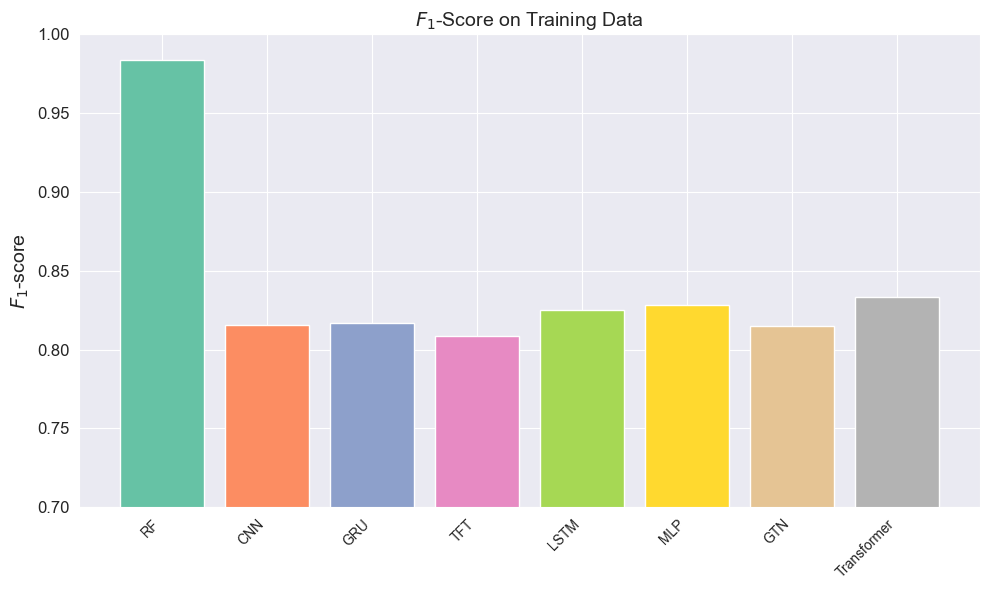

In [11]:
plt.figure(figsize=(10, 6))
bars = plt.bar(merge_df["Abbreviations"], merge_df['F1_Training_mean'], color=plt.cm.Set2.colors) #plt.cm.Pastel1.colors

plt.ylabel("$F_1$-score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.7, 1.00) #adapt the y-axis limits as needed
plt.title("$F_1$-Score on Training Data", fontsize=14)
plt.tight_layout()
plt.show()


In [31]:
def create_mean_std_plot(data):
    score = f"F1_{data}_mean"
    score_std = f"F1_{data}_std"
    
    plt.figure(figsize=(10, 6), facecolor="white")
    base_colors = sns.color_palette("tab10", n_colors=len(merge_df))
    colors = [sns.light_palette(c, n_colors=5)[2] for c in base_colors]  # mittlere Helligkeitsstufe auswählen


    bars = plt.bar(
        merge_df["Abbreviations"],
        merge_df[score],
        yerr=merge_df[score_std],         
        capsize=5,                     
        color=colors,
    )
    
    plt.ylabel("$F_1$-score", fontsize=14, fontweight='medium')
    plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='medium')
    plt.yticks(fontsize=14)
    plt.ylim(0.5, 1.00)  # ggf. anpassen
    plt.title(f"$F_1$-Score on Cross-Validated {data} Splits", fontsize=14, fontweight='medium')
    plt.tight_layout()
    plt.savefig(f'/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_score_{data}_CV.pdf', format='pdf', dpi=300)
    plt.show()


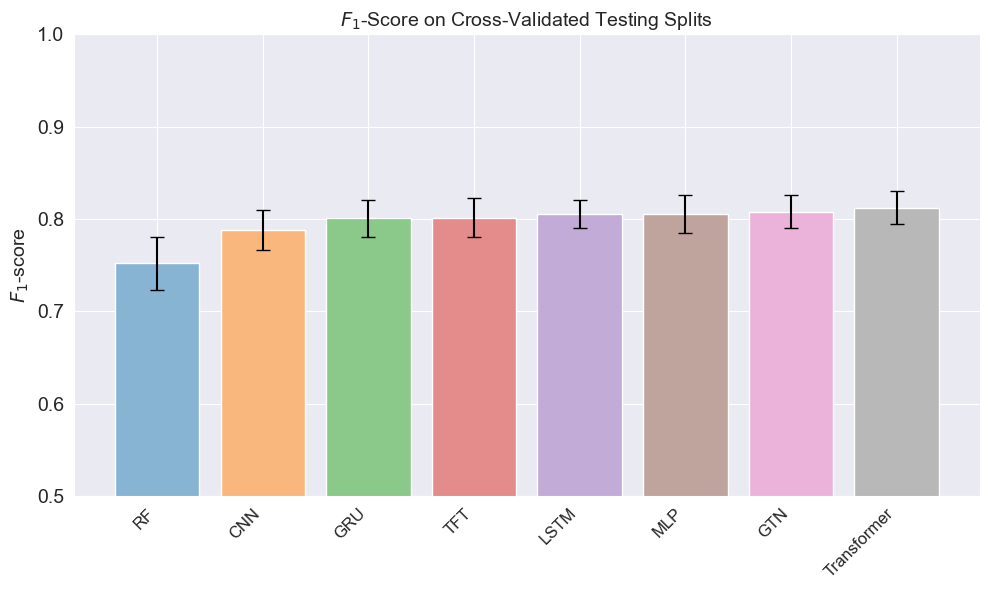

In [32]:
create_mean_std_plot("Testing")

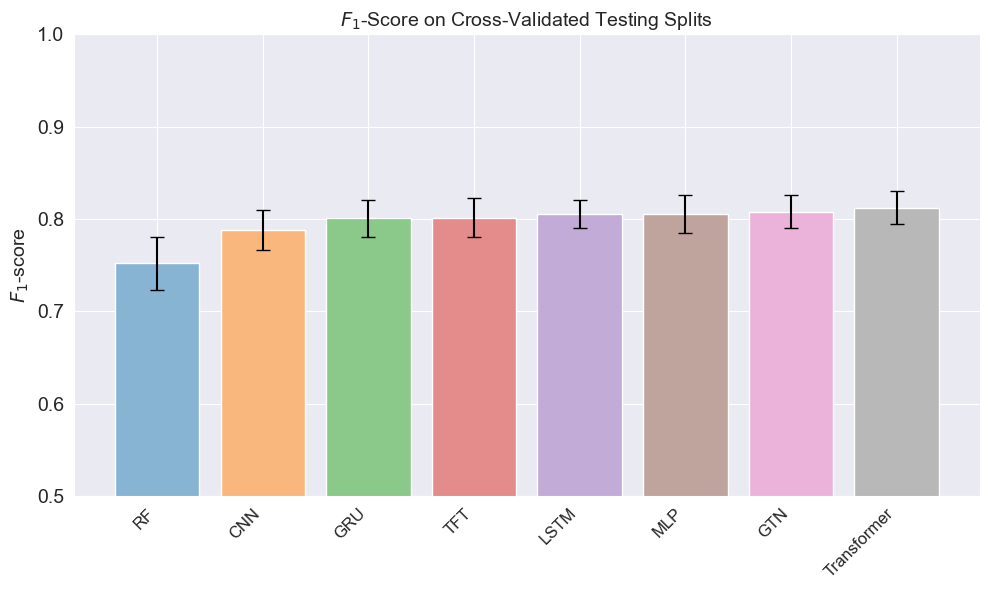

In [33]:
create_mean_std_plot("Testing")

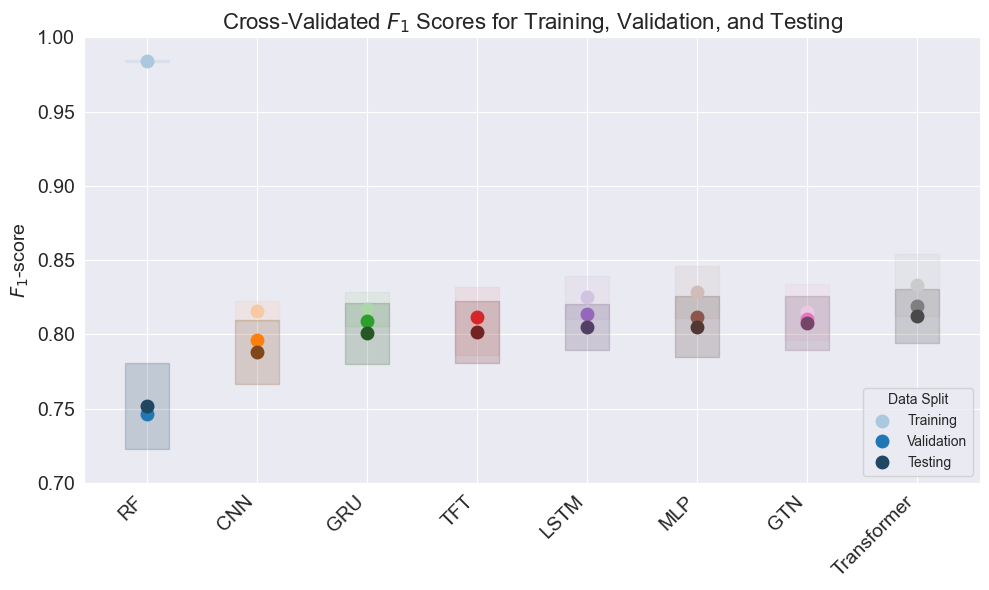

In [34]:
def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)

    # Basis-Farbpalette: eine Farbe pro Modell
    base_palette = sns.color_palette("tab10", n_colors=len(df))
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farben für die Legende (wir nehmen das erste Modell als Referenz)
    base_color_legend = base_palette[0]
    legend_shades_light = sns.light_palette(base_color_legend, n_colors=10, reverse=True)
    legend_shades_dark = sns.dark_palette(base_color_legend, n_colors=6, reverse=False)
    

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]

        # Erzeuge 3 abgestufte Farbtöne für Training, Validation, Testing
        base_color = base_palette[i]
        
        shades_light = sns.light_palette(base_color, n_colors=10, reverse=True)
        shades_dark = sns.dark_palette(base_color, n_colors=6, reverse=False)
        ax.plot(x, scores[0], 'o', color=shades_light[6], markersize=9, label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=shades_dark[5], markersize=9, label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=shades_dark[2], markersize=9, label="Testing" if i == 0 else "_nolegend_")

        # Halbtransparente Balken (Confidence Bands) für Training
        ax.fill_between(
            [x - 0.2, x + 0.2],
            scores[0] - row["F1_Training_std"],
            scores[0] + row["F1_Training_std"],
            color=shades_light[6],
            alpha=0.2
        )

        # Halbtransparente Balken (Confidence Bands) für Testing
        ax.fill_between(
            [x - 0.2, x + 0.2],
            scores[2] - row["F1_Testing_std"],
            scores[2] + row["F1_Testing_std"],
            color=shades_dark[2],
            alpha=0.2
        )

    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium')
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross-Validated $F_1$ Scores for Training, Validation, and Testing", fontsize=16, fontweight='medium')
    ax.yaxis.set_tick_params(labelsize=14)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color=legend_shades_light[6], label='Training', linestyle='None', markerfacecolor=legend_shades_light[6], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[5], label='Validation', linestyle='None', markerfacecolor=legend_shades_dark[5], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[2], label='Testing', linestyle='None', markerfacecolor=legend_shades_dark[2], markersize=9),
    ]
    ax.legend(handles=legend_elements, title="Data Split", loc="lower right")

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_score_all_CV.pdf', format='pdf', dpi=300)
    plt.show()
plot_f1_score_points(merge_df)

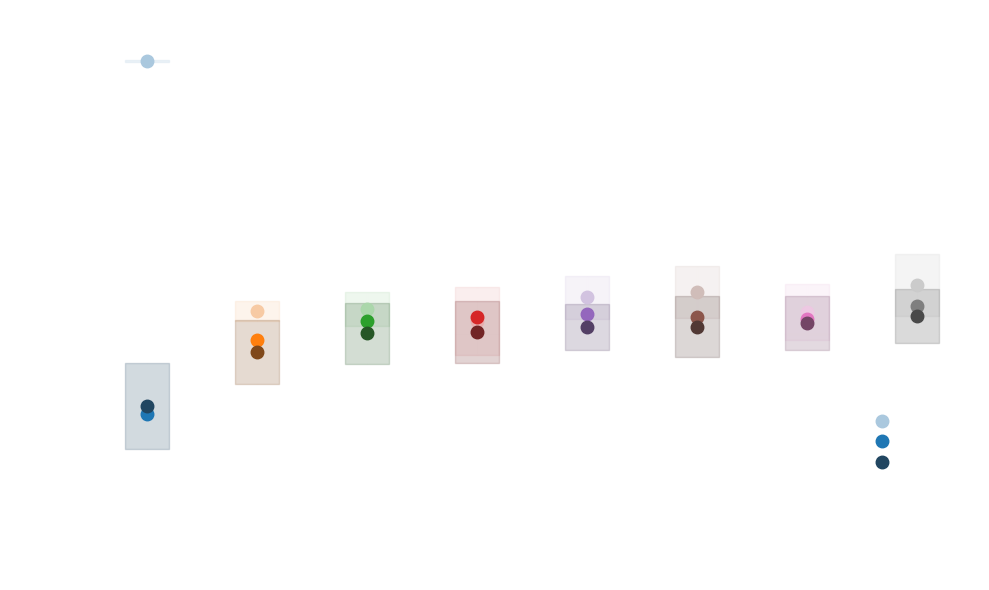

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)

    # Basis-Farbpalette: eine Farbe pro Modell
    base_palette = sns.color_palette("tab10", n_colors=len(df))
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Transparenter Figure-Hintergrund
    ax.set_facecolor('none')  # Transparenter Achsen-Hintergrund

    # Farben für die Legende (wir nehmen das erste Modell als Referenz)
    base_color_legend = base_palette[0]
    legend_shades_light = sns.light_palette(base_color_legend, n_colors=10, reverse=True)
    legend_shades_dark = sns.dark_palette(base_color_legend, n_colors=6, reverse=False)

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]

        base_color = base_palette[i]
        shades_light = sns.light_palette(base_color, n_colors=10, reverse=True)
        shades_dark = sns.dark_palette(base_color, n_colors=6, reverse=False)

        ax.plot(x, scores[0], 'o', color=shades_light[6], markersize=9, label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=shades_dark[5], markersize=9, label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=shades_dark[2], markersize=9, label="Testing" if i == 0 else "_nolegend_")

        ax.fill_between([x - 0.2, x + 0.2],
                        scores[0] - row["F1_Training_std"],
                        scores[0] + row["F1_Training_std"],
                        color=shades_light[6], alpha=0.2)
        ax.fill_between([x - 0.2, x + 0.2],
                        scores[2] - row["F1_Testing_std"],
                        scores[2] + row["F1_Testing_std"],
                        color=shades_dark[2], alpha=0.2)

    # Achsen und Labels weiß
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium', color='white')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium', color='white')
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross-Validated $F_1$ Scores for Training, Validation, and Testing",
                 fontsize=16, fontweight='medium', color='white')
    ax.yaxis.set_tick_params(labelsize=14, colors='white')
    ax.xaxis.set_tick_params(colors='white')

    # Achsenlinien weiß
    for spine in ax.spines.values():
        spine.set_color('white')

    # Legende
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color=legend_shades_light[6], label='Training', linestyle='None', markerfacecolor=legend_shades_light[6], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[5], label='Validation', linestyle='None', markerfacecolor=legend_shades_dark[5], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[2], label='Testing', linestyle='None', markerfacecolor=legend_shades_dark[2], markersize=9),
    ]
    leg = ax.legend(handles=legend_elements, title="Data Split", loc="lower right", facecolor='none', edgecolor='white')
    plt.setp(leg.get_title(), color='white')
    for text in leg.get_texts():
        text.set_color("white")

    plt.tight_layout()
    plt.savefig(
        '/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_score_all_CV_transparent.pdf',
        format='pdf', dpi=300, bbox_inches='tight', transparent=True
    )
    plt.show()
plot_f1_score_points(merge_df)

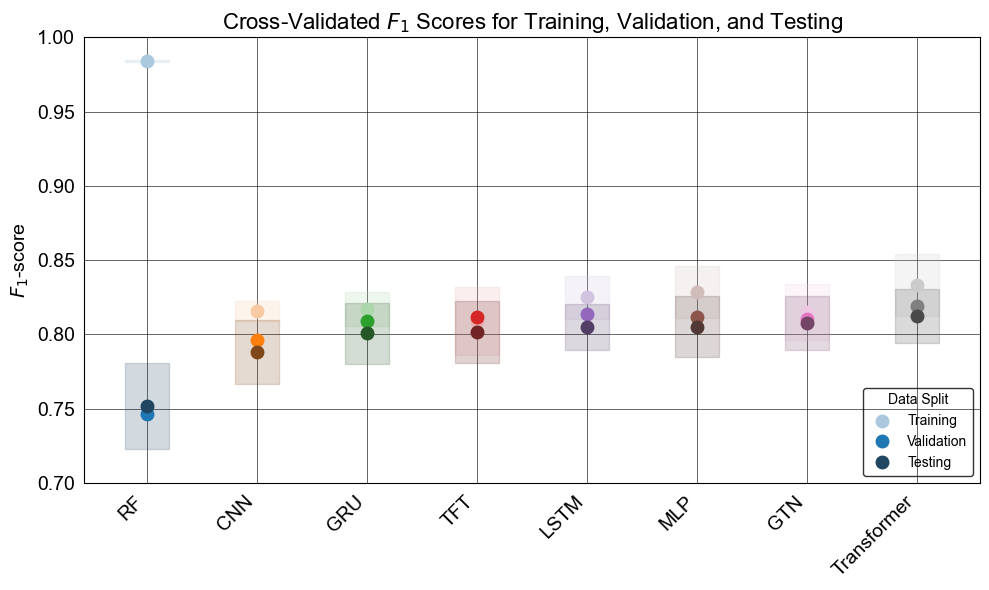

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_f1_score_points_black(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)

    # Basis-Farbpalette: eine Farbe pro Modell
    base_palette = sns.color_palette("tab10", n_colors=len(df))
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Transparenter Figure-Hintergrund
    ax.set_facecolor('none')  # Transparenter Achsen-Hintergrund

    # Farben für die Legende (wir nehmen das erste Modell als Referenz)
    base_color_legend = base_palette[0]
    legend_shades_light = sns.light_palette(base_color_legend, n_colors=10, reverse=True)
    legend_shades_dark = sns.dark_palette(base_color_legend, n_colors=6, reverse=False)

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]

        base_color = base_palette[i]
        shades_light = sns.light_palette(base_color, n_colors=10, reverse=True)
        shades_dark = sns.dark_palette(base_color, n_colors=6, reverse=False)

        ax.plot(x, scores[0], 'o', color=shades_light[6], markersize=9, label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=shades_dark[5], markersize=9, label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=shades_dark[2], markersize=9, label="Testing" if i == 0 else "_nolegend_")

        ax.fill_between([x - 0.2, x + 0.2],
                        scores[0] - row["F1_Training_std"],
                        scores[0] + row["F1_Training_std"],
                        color=shades_light[6], alpha=0.2)
        ax.fill_between([x - 0.2, x + 0.2],
                        scores[2] - row["F1_Testing_std"],
                        scores[2] + row["F1_Testing_std"],
                        color=shades_dark[2], alpha=0.2)

    # Achsen und Labels weiß
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium', color='black')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium', color='black')
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross-Validated $F_1$ Scores for Training, Validation, and Testing",
                 fontsize=16, fontweight='medium', color='black')
    ax.yaxis.set_tick_params(labelsize=14, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)


# Achsenlinien weiß
    for spine in ax.spines.values():
        spine.set_color('black')

    # Legende
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color=legend_shades_light[6], label='Training', linestyle='None', markerfacecolor=legend_shades_light[6], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[5], label='Validation', linestyle='None', markerfacecolor=legend_shades_dark[5], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[2], label='Testing', linestyle='None', markerfacecolor=legend_shades_dark[2], markersize=9),
    ]
    leg = ax.legend(handles=legend_elements, title="Data Split", loc="lower right", facecolor='none', edgecolor='black')
    plt.setp(leg.get_title(), color='black')
    for text in leg.get_texts():
        text.set_color("black")

    plt.tight_layout()
    plt.savefig(
        '/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_score_all_CV_transparent_black.pdf',
        format='pdf', dpi=300, bbox_inches='tight', transparent=True
    )
    plt.show()
plot_f1_score_points_black(merge_df)

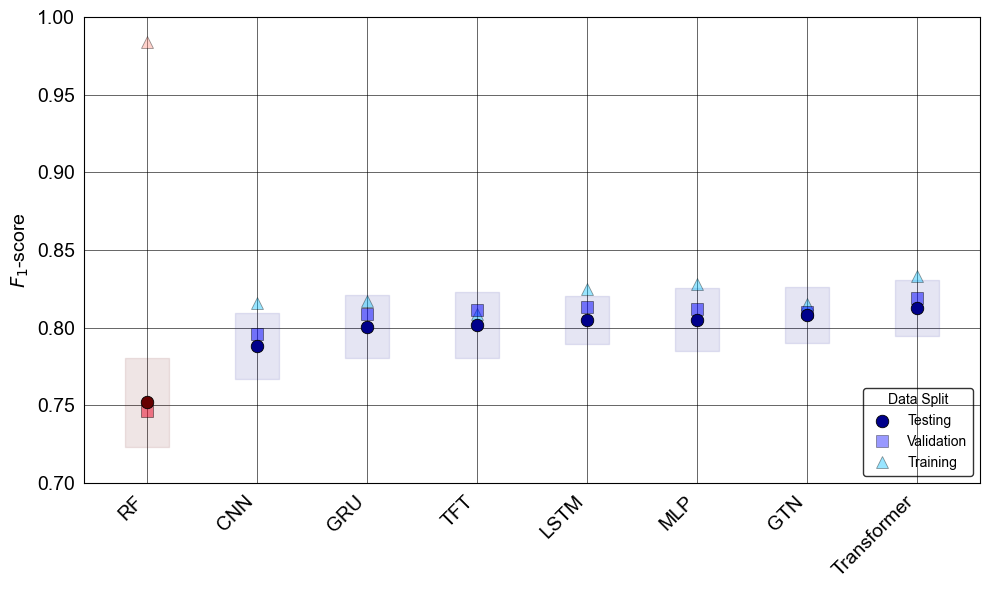

In [56]:
def plot_f1_score_points_black(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)
    color_train = 'deepskyblue'   
    color_val   = 'blue'  
    color_test  = 'darkblue'   

    marker_train = '^'  
    marker_val   = 's'  
    marker_test  = 'o'  

    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
    ax.set_facecolor('none')

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        f1_train = row["F1_Training_mean"]
        f1_val   = row["F1_Validation_mean"]
        f1_test  = row["F1_Testing_mean"]


        if row["Abbreviations"] == "RF":
            color_train = "#FF9080"
            color_val   = "#EA0022"   
            color_test  = "#660000"   
        else: 
            color_train = 'deepskyblue'   
            color_val   = 'blue'  
            color_test  = 'darkblue'
            
        
        ax.plot(x, f1_train, marker_train, color=color_train, markersize=9,
                markeredgecolor='black', markeredgewidth=0.6, alpha=0.4,
                label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, f1_val,   marker_val,   color=color_val,   markersize=9,
                markeredgecolor='black', markeredgewidth=0.6, alpha=0.5,
                label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, f1_test,  marker_test,  color=color_test,  markersize=9,
                markeredgecolor='black', markeredgewidth=0.6,
                label="Testing" if i == 0 else "_nolegend_")

        #ax.fill_between([x - 0.2, x + 0.2],  f1_train - row["F1_Training_std"],  f1_train + row["F1_Training_std"], color=color_train, alpha=0.2)
        ax.fill_between([x - 0.2, x + 0.2],
                        f1_test - row["F1_Testing_std"],
                        f1_test + row["F1_Testing_std"],
                        color=color_test, alpha=0.1)

    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14,
                       fontweight='medium', color='black')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium', color='black')
    ax.set_ylim(0.7, 1.0)
    ax.set_title("")
    ax.yaxis.set_tick_params(labelsize=14, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)

    for spine in ax.spines.values():
        spine.set_color('black')

    legend_elements = [
        plt.Line2D([0], [0], marker=marker_test,  color=color_test,  label='Testing',
                   linestyle='None', markerfacecolor=color_test,  markeredgecolor='black', markeredgewidth=0.6, markersize=9),
        plt.Line2D([0], [0], marker=marker_val,   color=color_val,   label='Validation',
                   linestyle='None', markerfacecolor=color_val,   markeredgecolor='black', markeredgewidth=0.6, markersize=9, alpha=0.4),
        plt.Line2D([0], [0], marker=marker_train, color=color_train, label='Training',
                   linestyle='None', markerfacecolor=color_train, markeredgecolor='black', markeredgewidth=0.6, markersize=9, alpha=0.4),

    ]
    leg = ax.legend(handles=legend_elements, title="Data Split", loc="lower right",
                    facecolor='none', edgecolor='black')
    plt.setp(leg.get_title(), color='black')
    for text in leg.get_texts():
        text.set_color("black")

    plt.tight_layout()
    plt.savefig(
        '/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_score_all_CV_transparent_black.pdf',
        format='pdf', dpi=300, bbox_inches='tight', transparent=True
    )
    plt.show()
plot_f1_score_points_black(merge_df)

### F1 Scores by Region (Coastal, Inland, Overall)

In [60]:
regions_df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/inland_coastal/f1_by_region.csv", sep=",")
regions_models_df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/inland_coastal/f1_oneModel_twoModel_inland_coastal.csv", sep=",")

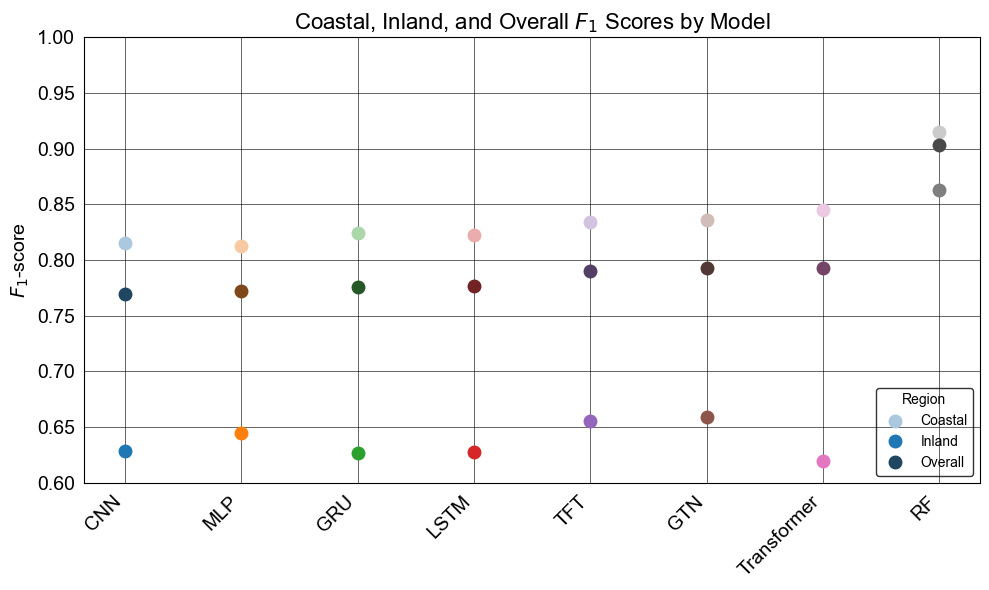

In [61]:
def plot_f1_score_points_regions_black(df, model_col="Abbreviations"):
    # Sort by overall performance (ascending) like before
    df = df.sort_values(by='F1_Overall_mean', ascending=True).reset_index(drop=True)

    # Basis-Farbpalette: eine Farbe pro Modell
    base_palette = sns.color_palette("tab10", n_colors=len(df))
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')  # Transparenter Figure-Hintergrund
    ax.set_facecolor('none')  # Transparenter Achsen-Hintergrund

    # Farben für die Legende (wir nehmen das erste Modell als Referenz)
    base_color_legend = base_palette[0]
    legend_shades_light = sns.light_palette(base_color_legend, n_colors=10, reverse=True)
    legend_shades_dark = sns.dark_palette(base_color_legend, n_colors=6, reverse=False)

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        # NEW: coastal, inland, overall (instead of training, validation, testing)
        scores = [row["F1_Coastal_mean"], row["F1_Inland_mean"], row["F1_Overall_mean"]]

        base_color = base_palette[i]
        shades_light = sns.light_palette(base_color, n_colors=10, reverse=True)
        shades_dark = sns.dark_palette(base_color, n_colors=6, reverse=False)

        # Points (reuse same “slot order”: 0,1,2)
        ax.plot(x, scores[0], 'o', color=shades_light[6], markersize=9, label="Coastal" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=shades_dark[5],  markersize=9, label="Inland"  if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=shades_dark[2],  markersize=9, label="Overall" if i == 0 else "_nolegend_")

        # Shaded bands: keep behavior; we mapped to coastal & overall
        #ax.fill_between([x - 0.2, x + 0.2], scores[0] - row["F1_Coastal_std"], scores[0] + row["F1_Coastal_std"], color=shades_light[6], alpha=0.2)
        #ax.fill_between([x - 0.2, x + 0.2], scores[2] - row["F1_Overall_std"], scores[2] + row["F1_Overall_std"], color=shades_dark[2], alpha=0.2)

    # Achsen und Labels schwarz
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium', color='black')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium', color='black')
    ax.set_ylim(0.6, 1.0)
    ax.set_title("Coastal, Inland, and Overall $F_1$ Scores by Model",
                 fontsize=16, fontweight='medium', color='black')
    ax.yaxis.set_tick_params(labelsize=14, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)

    # Achsenlinien schwarz
    for spine in ax.spines.values():
        spine.set_color('black')

    # Legende (Farblogik analog zu oben)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color=legend_shades_light[6], label='Coastal', linestyle='None', markerfacecolor=legend_shades_light[6], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[5],  label='Inland',  linestyle='None', markerfacecolor=legend_shades_dark[5],  markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[2],  label='Overall', linestyle='None', markerfacecolor=legend_shades_dark[2],  markersize=9),
    ]
    leg = ax.legend(handles=legend_elements, title="Region", loc="lower right", facecolor='none', edgecolor='black')
    plt.setp(leg.get_title(), color='black')
    for text in leg.get_texts():
        text.set_color("black")

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_scores_by_region_transparent_black.pdf', format='pdf', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
plot_f1_score_points_regions_black(regions_df)

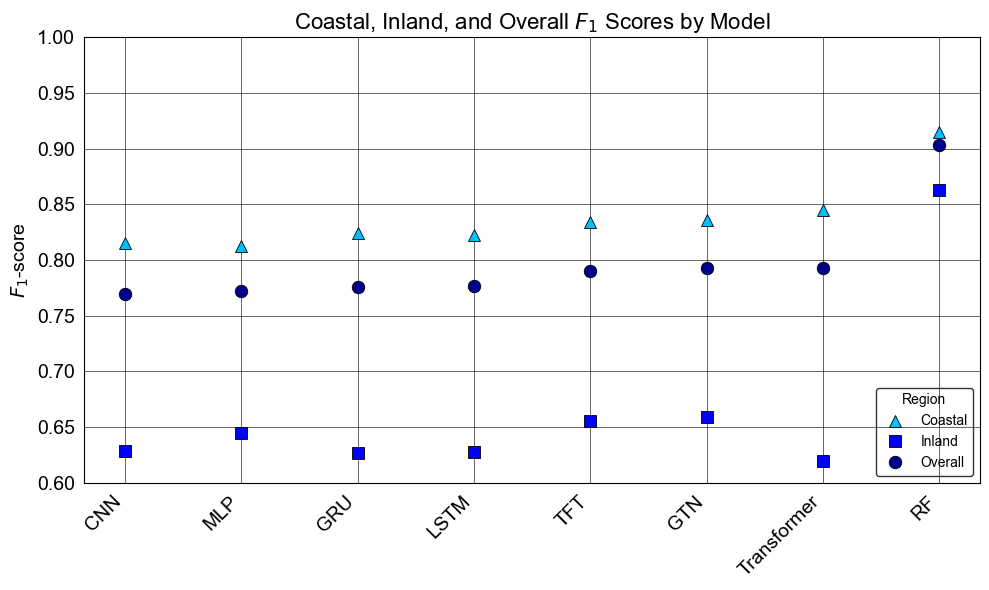

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_f1_score_points_regions_black(df, model_col="Abbreviations"):

    df = df.sort_values(by='F1_Overall_mean', ascending=True).reset_index(drop=True)


    color_coastal = 'deepskyblue'   # heller Ton
    color_inland  = 'blue'   # mittlerer Ton
    color_overall = 'darkblue'  # dunkler Ton

    marker_coastal = '^'  # Dreieck
    marker_inland  = 's'  # Quadrat (Rechteck)
    marker_overall = 'o'  # Kreis

    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
    ax.set_facecolor('none')

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        f1_coastal = row["F1_Coastal_mean"]
        f1_inland  = row["F1_Inland_mean"]
        f1_overall = row["F1_Overall_mean"]

        # Punkte mit einheitlichen Farben & Markerformen
        ax.plot(x, f1_coastal, marker_coastal, color=color_coastal, markersize=9,
                markeredgecolor='black', markeredgewidth=0.6,
                label="Coastal" if i == 0 else "_nolegend_")
        ax.plot(x, f1_inland,  marker_inland,  color=color_inland,  markersize=9,
                markeredgecolor='black', markeredgewidth=0.6,
                label="Inland"  if i == 0 else "_nolegend_")
        ax.plot(x, f1_overall, marker_overall, color=color_overall, markersize=9,
                markeredgecolor='black', markeredgewidth=0.6,
                label="Overall" if i == 0 else "_nolegend_")

    # Achsen/Labels (schwarz)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium', color='black')
    ax.set_ylabel("$F_1$-score", fontsize=14, fontweight='medium', color='black')
    ax.set_ylim(0.6, 1.0)
    ax.set_title("Coastal, Inland, and Overall $F_1$ Scores by Model",
                 fontsize=16, fontweight='medium', color='black')
    ax.yaxis.set_tick_params(labelsize=14, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)

    for spine in ax.spines.values():
        spine.set_color('black')

    # Legende passend zu Marker & Farben
    legend_elements = [
        plt.Line2D([0], [0], marker=marker_coastal, color=color_coastal, label='Coastal',
                   linestyle='None', markerfacecolor=color_coastal, markeredgecolor='black', markeredgewidth=0.6, markersize=9),
        plt.Line2D([0], [0], marker=marker_inland,  color=color_inland,  label='Inland',
                   linestyle='None', markerfacecolor=color_inland,  markeredgecolor='black', markeredgewidth=0.6, markersize=9),
        plt.Line2D([0], [0], marker=marker_overall, color=color_overall, label='Overall',
                   linestyle='None', markerfacecolor=color_overall, markeredgecolor='black', markeredgewidth=0.6, markersize=9),
    ]
    leg = ax.legend(handles=legend_elements, title="Region", loc="lower right", facecolor='none', edgecolor='black')
    plt.setp(leg.get_title(), color='black')
    for text in leg.get_texts():
        text.set_color("black")

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_scores_by_region_transparent_black.pdf', format='pdf', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
plot_f1_score_points_regions_black(regions_df)

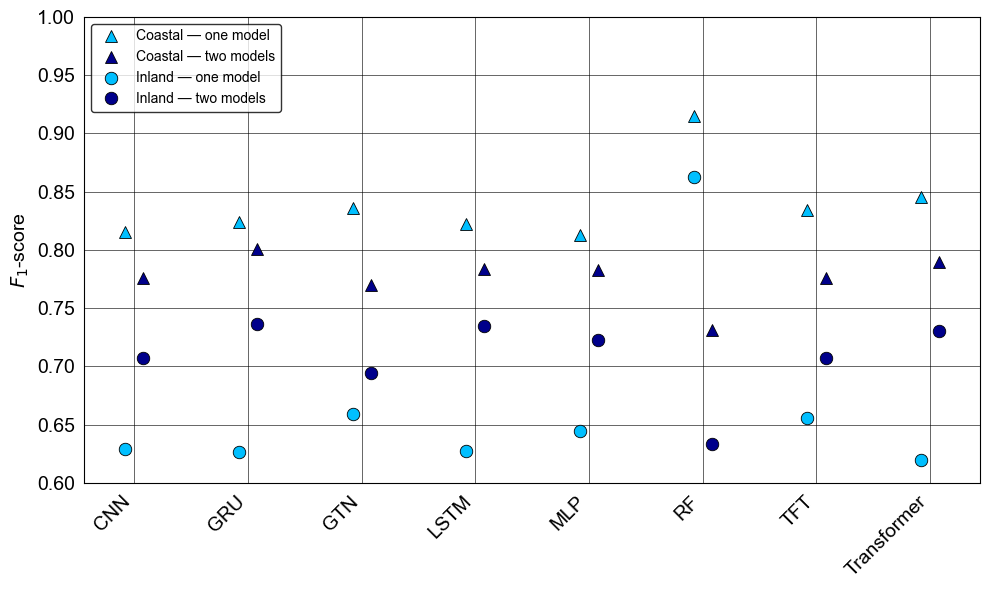

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def plot_f1_score_points_regions(df, model_col="Abbreviation", savepath=None):
    # Encoding
    regime_colors  = {"OneModel": "deepskyblue", "TwoModels": "darkblue"}  # colour by regime
    region_markers = {"Coastal": "^", "Inland": "o"}                        # marker by region
    regimes = ["OneModel", "TwoModels"]
    regions = ["Coastal", "Inland"]

    # small x-offset so one/two-model points don't overlap
    x_offset = {"OneModel": -0.08, "TwoModels": +0.08}

    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
    ax.set_facecolor('none')

    # Plot (preserve given CSV order)
    for i, (_, row) in enumerate(df.iterrows()):
        x_base = i
        for reg in regimes:
            for region in regions:
                col = f"F1_{region}_{reg}"  # expects columns from your CSV
                if col not in df.columns:
                    continue
                y = row[col]
                ax.plot(
                    x_base + x_offset[reg],
                    y,
                    region_markers[region],                 # marker encodes region
                    markersize=9,
                    color=regime_colors[reg],               # color encodes regime
                    markeredgecolor='black',
                    markeredgewidth=0.6,
                    linestyle='None',
                )

    # Axes / labels (black)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right",
                       fontsize=14, fontweight='medium', color='black')
    ax.set_ylabel(r"$F_1$-score", fontsize=14, fontweight='medium', color='black')
    ax.set_ylim(0.6, 1.0)
    ax.set_title("")
    ax.yaxis.set_tick_params(labelsize=14, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)
    for spine in ax.spines.values():
        spine.set_color('black')

    # Single combined legend: Region × Regime
    handles = []
    for region, m in region_markers.items():
        for reg, c in regime_colors.items():
            label = f"{region} — {'one model' if reg=='OneModel' else 'two models'}"
            h = plt.Line2D([0], [0], marker=m, linestyle='None', markersize=9,
                           markerfacecolor=c, markeredgecolor='black', markeredgewidth=0.6,
                           color=c, label=label)
            handles.append(h)
    leg = ax.legend(handles=handles, title="", loc="upper left",
                    facecolor='white', edgecolor='black')
    for txt in leg.get_texts():
        txt.set_color('black')
    plt.setp(leg.get_title(), color='black')

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_scores_by_region.pdf', format='pdf', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

plot_f1_score_points_regions(regions_models_df)

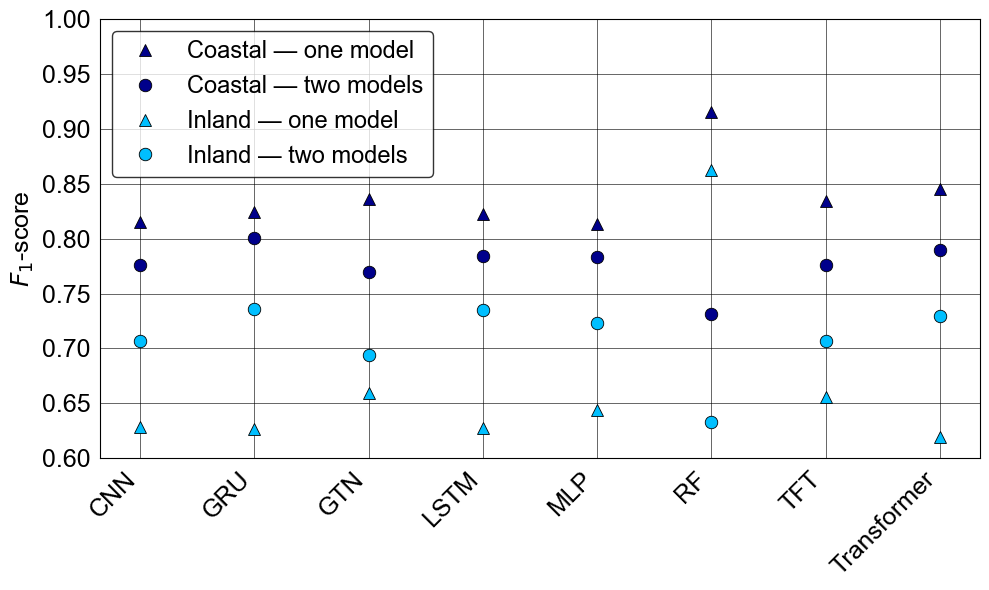

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_f1_by_region_and_regime_csv(df, model_col="Abbreviation"):
    # Marker by regime
    regime_markers = {"OneModel": "^", "TwoModels": "o"}   # ^ = one model, o = two models
    # Color by region
    region_colors  = {"Coastal": "darkblue", "Inland": "deepskyblue"}  # darkblue = coastal, deepskyblue = inland
    regimes = ["OneModel", "TwoModels"]
    regions = ["Coastal", "Inland"]

    # Small x-offset so the two regimes don't overlap
    x_offset = {"OneModel": -0.00, "TwoModels": +0.00}

    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
    ax.set_facecolor('none')

    # Preserve CSV row order
    for i, (_, row) in enumerate(df.iterrows()):
        x_base = i
        for reg in regimes:
            for region in regions:
                col = f"F1_{region}_{reg}"
                if col not in df.columns:
                    continue
                y = row[col]
                ax.plot(
                    x_base + x_offset[reg],
                    y,
                    regime_markers[reg],
                    markersize=9,
                    color=region_colors[region],      # color encodes region
                    markeredgecolor='black',
                    markeredgewidth=0.6,
                    linestyle='None',
                    label="_nolegend_"                 # legend created manually below
                )

    # Axes / labels (black)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right",
                       fontsize=18, fontweight='medium', color='black')
    ax.set_ylabel(r"$F_1$-score", fontsize=18, fontweight='medium', color='black')
    ax.set_ylim(0.6, 1.0)
    ax.set_title("")
    ax.yaxis.set_tick_params(labelsize=18, colors='black')
    ax.xaxis.set_tick_params(colors='black')
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)
    for spine in ax.spines.values():
        spine.set_color('black')

    # --- Single combined legend (upper left): Region × Regime ---
    combined_handles = []
    for region, col in region_colors.items():
        for reg, marker in regime_markers.items():
            label = f"{region} — {'one model' if reg=='OneModel' else 'two models'}"
            h = plt.Line2D([0], [0],
                           marker=marker, linestyle='None', markersize=9,
                           markerfacecolor=col, markeredgecolor='black', markeredgewidth=0.6,
                           color=col, label=label)
            combined_handles.append(h)

    leg = ax.legend(handles=combined_handles, title="", loc="upper left",
                    facecolor='white', edgecolor='black', fontsize=17, framealpha=0.8)
    plt.setp(leg.get_title(), color='black')
    for text in leg.get_texts():
        text.set_color("black")

    plt.tight_layout()
    plt.savefig(
        '/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/F1_scores_by_region_regime_transparent_black.pdf',
        format='pdf', dpi=300, bbox_inches='tight', transparent=True
    )
    plt.show()
plot_f1_by_region_and_regime_csv(regions_models_df)

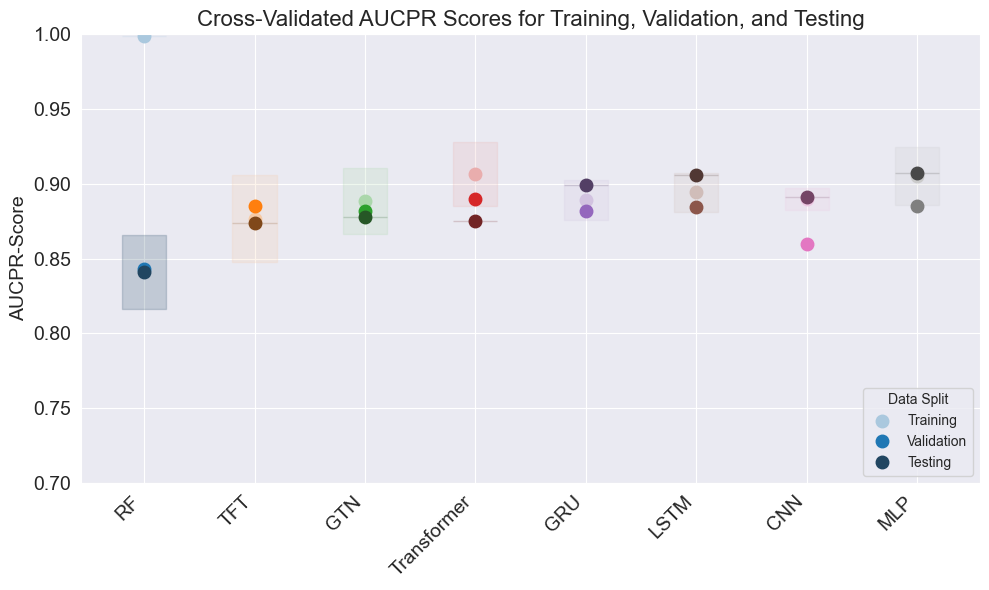

In [39]:
def plot_f1_score_points_aucpr(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)

    # Basis-Farbpalette: eine Farbe pro Modell
    base_palette = sns.color_palette("tab10", n_colors=len(df))
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farben für die Legende (wir nehmen das erste Modell als Referenz)
    base_color_legend = base_palette[0]
    legend_shades_light = sns.light_palette(base_color_legend, n_colors=10, reverse=True)
    legend_shades_dark = sns.dark_palette(base_color_legend, n_colors=6, reverse=False)


    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["AUCPR_Training_mean"], row["AUCPR_Validation_mean"], row["AUCPR_Testing_mean"]]

        # Erzeuge 3 abgestufte Farbtöne für Training, Validation, Testing
        base_color = base_palette[i]

        shades_light = sns.light_palette(base_color, n_colors=10, reverse=True)
        shades_dark = sns.dark_palette(base_color, n_colors=6, reverse=False)
        ax.plot(x, scores[0], 'o', color=shades_light[6], markersize=9, label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=shades_dark[5], markersize=9, label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=shades_dark[2], markersize=9, label="Testing" if i == 0 else "_nolegend_")

        # Halbtransparente Balken (Confidence Bands) für Training
        ax.fill_between(
            [x - 0.2, x + 0.2],
            scores[0] - row["AUCPR_Training_std"],
            scores[0] + row["AUCPR_Training_std"],
            color=shades_light[6],
            alpha=0.2
        )

        # Halbtransparente Balken (Confidence Bands) für Testing
        ax.fill_between(
            [x - 0.2, x + 0.2],
            scores[2] - row["AUCPR_Testing_std"],
            scores[2] + row["AUCPR_Testing_std"],
            color=shades_dark[2],
            alpha=0.2
        )

    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=14, fontweight='medium')
    ax.set_ylabel("AUCPR-Score", fontsize=14, fontweight='medium')
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross-Validated AUCPR Scores for Training, Validation, and Testing", fontsize=16, fontweight='medium')
    ax.yaxis.set_tick_params(labelsize=14)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color=legend_shades_light[6], label='Training', linestyle='None', markerfacecolor=legend_shades_light[6], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[5], label='Validation', linestyle='None', markerfacecolor=legend_shades_dark[5], markersize=9),
        plt.Line2D([0], [0], marker='o', color=legend_shades_dark[2], label='Testing', linestyle='None', markerfacecolor=legend_shades_dark[2], markersize=9),
    ]
    ax.legend(handles=legend_elements, title="Data Split", loc="lower right")

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/F1_score/AUCPR_score_all_CV.pdf', format='pdf', dpi=300)
    plt.show()
plot_f1_score_points_aucpr(merge_df)

In [40]:
def get_f1_scores_by_model(datatype="Testing"):
    files = {
        "LSTM": f"{PATH}/lstm_cv_results.csv",
        "GRU": f"{PATH}/gru_cv_results.csv",
        "MLP": f"{PATH}/mlp_cv_results.csv",
        "CNN": f"{PATH}/cnn_cv_results.csv",
        "Transformer": f"{PATH}/transformer_cv_results.csv",
        "RF": f"{PATH}/rf_cv_results.csv",
        "TFT": f"{PATH}/tft_cv_results.csv",
        "GTN": f"{PATH}/gtn_cv_results.csv",
        
    }
    
    if datatype == "Validation":
        coloum_name = "val_f1_score"
    elif datatype == "Testing":
        coloum_name = "train_f1_score"
    elif datatype == "Training":
        coloum_name = "train_f1_score"
    else:
        raise ValueError("Datatype must be 'Validation', 'Testing', or 'Training'.")
    
    f1_scores_by_model = {}
    for model_name, path in files.items():
        df = pd.read_csv(path)
        if coloum_name in df.columns:
            f1_scores_by_model[model_name] = df[coloum_name]
        else:
            print(f"Warnung: {coloum_name} nicht in {model_name}")
            
    return f1_scores_by_model

# Modellvergleich with Kruskal-Wallis Test

In [49]:
def calculate_kruskal_wallis_test(data):
    """
    Führt den Kruskal-Wallis-Test auf den F1-Scores durch.
    
    :param data: DataFrame mit den F1-Scores der Modelle
    :return: Statistik und p-Wert des Tests
    """
    f1_scores_by_model = get_f1_scores_by_model(data)
    statistic, p_value = kruskal(*f1_scores_by_model.values())
    print(f"Kruskal-Wallis Test Statistic for {data}: {statistic}, p-value: {p_value}")
    return statistic, p_value

In [50]:
calculate_kruskal_wallis_test("Validation")
calculate_kruskal_wallis_test("Testing")

Kruskal-Wallis Test Statistic for Validation: 31.97639202858533, p-value: 4.10272501961747e-05
Kruskal-Wallis Test Statistic for Testing: 53.06512396694211, p-value: 3.598990563560811e-09


(53.06512396694211, 3.598990563560811e-09)

# Modellvergleich with ANOVA F-Test

In [18]:
def calculate_anova_f_test(data):
    """
    Führt den ANOVA F-Test auf den F1-Scores durch.
    
    :param data: DataFrame mit den F1-Scores der Modelle
    :return: Statistik und p-Wert des Tests
    """
    f1_scores_by_model = get_f1_scores_by_model(data)
    statistic, p_value = f_oneway(*f1_scores_by_model.values())
    print(f"ANOVA F-Test Statistic for {data}: {statistic}, p-value: {p_value}")
    return statistic, p_value

In [19]:
calculate_anova_f_test("Validation")
calculate_anova_f_test("Testing")

ANOVA F-Test Statistic for Validation: 9.747790121382005, p-value: 1.9425569917375537e-09
ANOVA F-Test Statistic for Testing: 205.8538974261265, p-value: 7.135215594263077e-61


(205.8538974261265, 7.135215594263077e-61)

# Pairwise Dunn-Test with Holm-Correction

In [20]:
def calculate_dunn_test(data, path=PATH):
    """
    Führt den paarweisen Dunn-Test mit Holm-Korrektur durch.

    :param data: 'Training', 'Validation' oder 'Testing'
    :param path: Pfad zum Verzeichnis mit den CSV-Dateien
    :return: DataFrame mit paarweisen p-Werten
    """
    files = {
        "LSTM": f"{path}/lstm_cv_results.csv",
        "GRU": f"{path}/gru_cv_results.csv",
        "MLP": f"{path}/mlp_cv_results.csv",
        "CNN": f"{path}/cnn_cv_results.csv",
        "Transformer": f"{path}/transformer_cv_results.csv",
        "RF": f"{path}/rf_cv_results.csv",
        "TFT": f"{path}/tft_cv_results.csv",
        "GTN": f"{path}/gtn_cv_results.csv",
    }

    colname_map = {
        "Training": "train_f1_score",
        "Validation": "val_f1_score",
        "Testing": "test_f1_score",
    }

    col = colname_map.get(data)
    if col is None:
        raise ValueError("Datatype must be 'Validation', 'Testing', or 'Training'.")

    # Sammle Daten in langem Format
    all_scores = []
    for model, filepath in files.items():
        try:
            df = pd.read_csv(filepath)
            if col in df.columns:
                for value in df[col]:
                    all_scores.append({"Model": model, "F1": value})
            else:
                print(f"Warning: Coloumn {col} not found in file {model}")
        except FileNotFoundError:
            print(f"Warning: File missing: {filepath}")

    df_long = pd.DataFrame(all_scores)

    # Führe Dunn-Test durch
    dunn_result = sp.posthoc_dunn(df_long, val_col='F1', group_col='Model', p_adjust='holm')
    return dunn_result


In [21]:
testing_results = calculate_dunn_test("Testing")

In [22]:
def plot_dunn_heatmap(dunn_result, title="Post-hoc Dunn Test (Holm-corrected)"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        dunn_result,
        annot=True,
        fmt=".1e",
        cmap="RdBu",
        linewidths=0.5,
        cbar_kws={"label": "p-value"},
        square=True
    )
    plt.title(title, fontsize=16, fontweight='medium')
    plt.xticks(rotation=45, ha="right", fontsize=14, fontweight='medium')
    plt.yticks(rotation=0, fontsize=14, fontweight='medium')
    plt.tight_layout()
    plt.show()


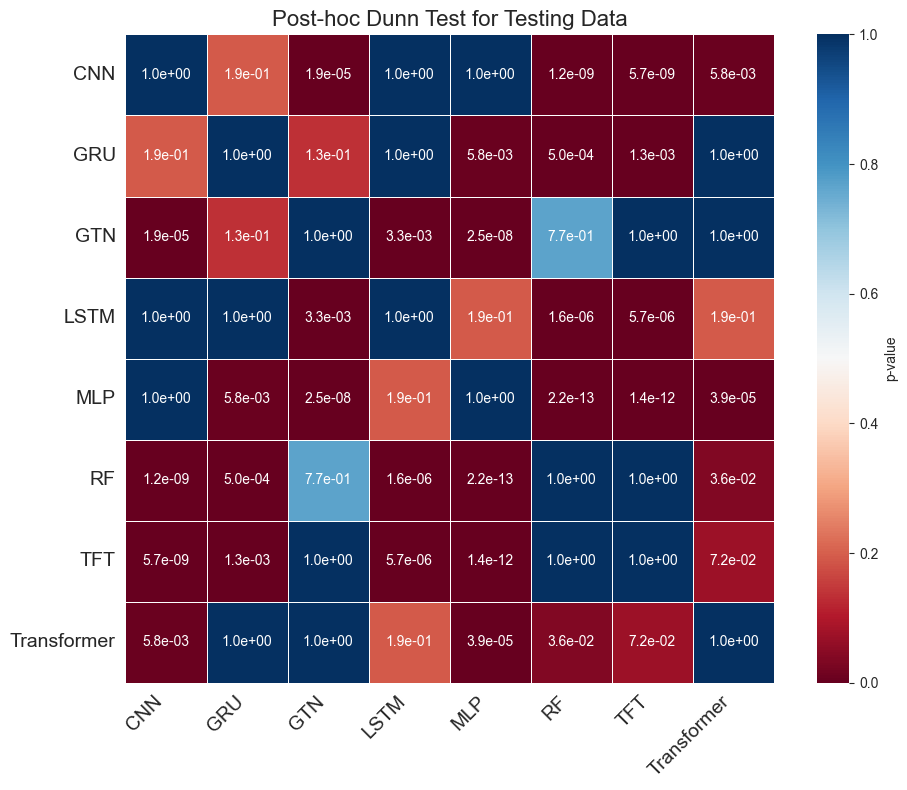

In [23]:
plot_dunn_heatmap(testing_results, 
                   title="Post-hoc Dunn Test for Testing Data")

/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_20847/4122018810.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = dunn_result.applymap(lambda p: f"{p:.2e} {p_to_star(p)}")


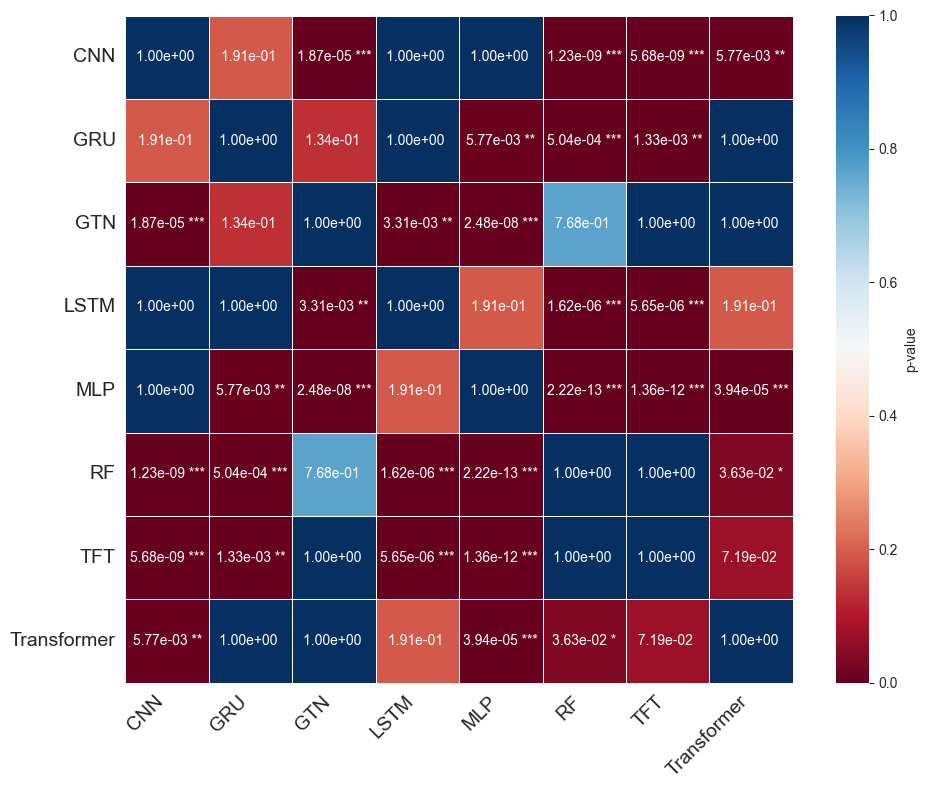

In [31]:
def plot_dunn_heatmap(dunn_result, title="Post-hoc Dunn Test (Holm-corrected)"):
    # Convert p-values into stars
    def p_to_star(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return ""

    annot_labels = dunn_result.applymap(lambda p: f"{p:.2e} {p_to_star(p)}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        dunn_result,
        annot=annot_labels,   # use stars instead of numbers
        fmt="",
        cmap="RdBu",       # reversed so red=low p, blue=high p (optional)
        linewidths=0.5,
        cbar_kws={"label": "p-value"},
        square=True
    )
    #plt.title(title, fontsize=16, fontweight='medium')
    plt.xticks(rotation=45, ha="right", fontsize=14, fontweight='medium')
    plt.yticks(rotation=0, fontsize=14, fontweight='medium')
    plt.tight_layout()
    plt.savefig(
        f"/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Paper/Post-hoc_Dunn.png",
        format="png", dpi=300, transparent=True
    )
    plt.show()
plot_dunn_heatmap(testing_results, 
                   title="Post-hoc Dunn Test for Testing Data")

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, ttest_rel
import statsmodels.stats.multitest as smm

# ---- 1) CSV laden ----
# CSV enthält 1 Zeile pro Modell, Spalten:
# precision-coastal, precision-inland, recall-coastal, recall-inland, f1-score-coastal, f1-score-inland
df = pd.read_csv("/csv/inland_coastal/Coastal_inland.csv", sep=";")

# Mapping: {metriksname: (coastal_col, inland_col)}
pairs = {
    "precision": ("precision-coastal", "precision-inland"),
    "recall":    ("recall-coastal", "recall-inland"),
    "f1":        ("f1-score-coastal", "f1-score-inland"),
}

rows = []
for metric, (c_col, i_col) in pairs.items():
    x = df[c_col].astype(float).values  # coastal
    y = df[i_col].astype(float).values  # inland

    # Sanity: gleiche Länge & keine NaNs
    mask = ~(np.isnan(x) | np.isnan(y))
    x, y = x[mask], y[mask]
    n = len(x)
    if n < 2:
        raise ValueError(f"Zu wenige Paare für {metric}")

    # Differenzen (coastal - inland)
    d = x - y

    # ---- Wilcoxon signed-rank (zweiseitig) ----
    w_stat, p_w = wilcoxon(x, y, zero_method="wilcox", alternative="two-sided", correction=False, mode="auto")

    # Z-Approx für Effektgröße r
    mean_w = n*(n+1)/4
    sd_w = np.sqrt(n*(n+1)*(2*n+1)/24)
    z = (w_stat - mean_w) / (sd_w + 1e-12)
    r = z / np.sqrt(n)

    # ---- Optional: gepaarter t-Test ----
    t_stat, p_t = ttest_rel(x, y)
    dz = d.mean() / (d.std(ddof=1) + 1e-12)  # Cohen's d_z

    rows.append({
        "metric": metric.upper(),
        "n_models": n,
        "mean_coastal": x.mean(),
        "mean_inland": y.mean(),
        "mean_diff(coast-inland)": d.mean(),
        "wilcoxon_stat": w_stat,
        "wilcoxon_p": p_w,
        "effect_r": r,              # ~0.1 klein, ~0.3 mittel, ~0.5 groß
        "ttest_t": t_stat,
        "ttest_p": p_t,
        "effect_dz": dz             # ~0.2 klein, ~0.5 mittel, ~0.8 groß
    })

res = pd.DataFrame(rows).sort_values("wilcoxon_p").reset_index(drop=True)

# ---- 2) FDR-Korrektur über die 3 Metriken (für Wilcoxon-p) ----
rej, p_fdr, *_ = smm.multipletests(res["wilcoxon_p"].values, alpha=0.05, method="fdr_bh")
res["wilcoxon_p_fdr"] = p_fdr
res["wilcoxon_signif(0.05)"] = rej

print(res.to_string(index=False))


   metric  n_models  mean_coastal  mean_inland  mean_diff(coast-inland)  wilcoxon_stat  wilcoxon_p  effect_r   ttest_t  ttest_p  effect_dz  wilcoxon_p_fdr  wilcoxon_signif(0.05)
PRECISION         8      0.803445     0.686421                 0.117024            0.0    0.007812 -0.891133 13.250992 0.000003   4.684933        0.007812                   True
   RECALL         8      0.876301     0.735176                 0.141125            0.0    0.007812 -0.891133  9.180348 0.000037   3.245743        0.007812                   True
       F1         8      0.838046     0.708129                 0.129917            0.0    0.007812 -0.891133 14.410557 0.000002   5.094901        0.007812                   True
